# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,S3,S4
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,2.131208602150538,18.303930400782015
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,5.302010557184752,18.826870772238514
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,11.476136070381234,18.06877732160313
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,4.079298533724341,18.179439296187688
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,8.864481720430108,18.350898142717497
...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,2.2052527859237534,17.840430889540567
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,0.8687593352883677,18.837203519061585
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,7.001963636363637,18.109645356793745
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,1.3085294232649072,20.284596676441836


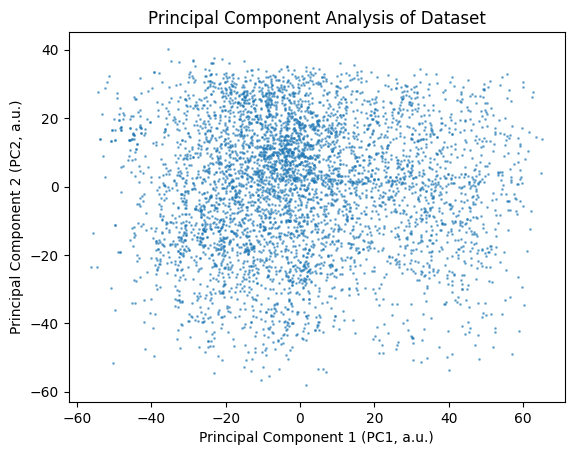

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.show()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.show()
    return r2, mse, rmse, mae

# Evaluation against Measurement Standards

In [6]:
import numpy as np

def evaluate_bhs(differences_mmHg):
    differences_mmHg = np.abs(differences_mmHg)
    n = len(differences_mmHg)
    pct_5 = np.sum(differences_mmHg <= 5) / n * 100
    pct_10 = np.sum(differences_mmHg <= 10) / n * 100
    pct_15 = np.sum(differences_mmHg <= 15) / n * 100

    # Assign grade
    if pct_5 >= 60 and pct_10 >= 85 and pct_15 >= 95:
        grade = 'A'
    elif pct_5 >= 50 and pct_10 >= 75 and pct_15 >= 90:
        grade = 'B'
    elif pct_5 >= 40 and pct_10 >= 65 and pct_15 >= 85:
        grade = 'C'
    else:
        grade = 'D'

    return {
        'grade': grade,
        'percent_within_5mmHg': pct_5,
        'percent_within_10mmHg': pct_10,
        'percent_within_15mmHg': pct_15
    }

def evaluate_aami(differences_mmHg):
    differences_mmHg = np.array(differences_mmHg)
    mean_error = np.mean(differences_mmHg)
    std_dev = np.std(differences_mmHg, ddof=1)  # Sample std dev

    pass_fail = 'Pass' if abs(mean_error) <= 5 and std_dev <= 8 else 'Fail'

    return {
        'pass_fail': pass_fail,
        'mean_error_mmHg': mean_error,
        'std_dev_mmHg': std_dev
    }


# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [7]:
def train_and_evaluate_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    model = model_cls(**(model_kwargs or {}))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    return y_test, y_pred

def print_cross_val_results(label, metrics, bhs_results, aami_results):
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")
    
    # Aggregate BHS results
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    print(f"\n{label} BHS Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Grade: {avg_bhs['grade']}")
    print(f"Percent within 5 mmHg: {avg_bhs['percent_within_5mmHg']:.3e}%")
    print(f"Percent within 10 mmHg: {avg_bhs['percent_within_10mmHg']:.3e}%")
    print(f"Percent within 15 mmHg: {avg_bhs['percent_within_15mmHg']:.3e}%")
    
    # Aggregate AAMI results
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    print(f"\n{label} AAMI Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Mean Error (mmHg): {avg_aami['mean_error_mmHg']:.3e}")
    print(f"Standard Deviation (mmHg): {avg_aami['std_dev_mmHg']:.2f}")
    print(f"Pass/Fail: {avg_aami['pass_fail']}")

def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, plot=True):
    metrics = []
    bhs_results = []
    aami_results = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        
        y_test, y_pred = train_and_evaluate_model(
            model_cls, X_train, X_test, y_train, y_test, model_kwargs, scale_y, y_scaler
        )
        
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} (Fold {fold+1})", plot=(plot and fold==0))
        metrics.append([r2, mse, rmse, mae])
        
        # Evaluate against standards
        differences = y_test - y_pred
        bhs_results.append(evaluate_bhs(differences))
        aami_results.append(evaluate_aami(differences))
    
    print_cross_val_results(label, metrics, bhs_results, aami_results)

# Testing Various Models

In [8]:
MODELS_TO_TEST = {
    "LinearRegression": True,
    "RandomForestRegressor": True,
    "XGBRegressor": True,
    "SupportVectorRegressor": True,
    "CatBoostRegressor": True,
    "MultilayerPerceptronRegressor": False,
    "MultilayerPerceptronScaledRegressor": False,
}

## Linear Regression

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 1)  0.004322  51.436241  7.171906  5.611979


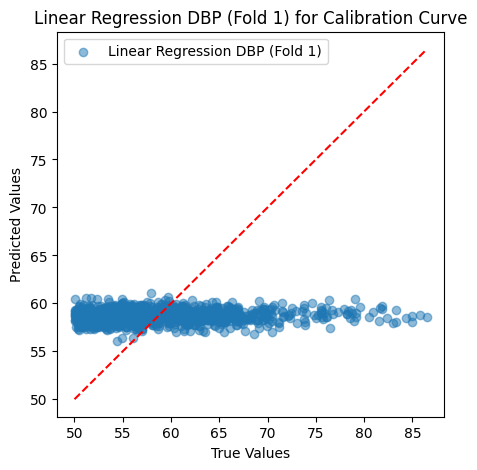

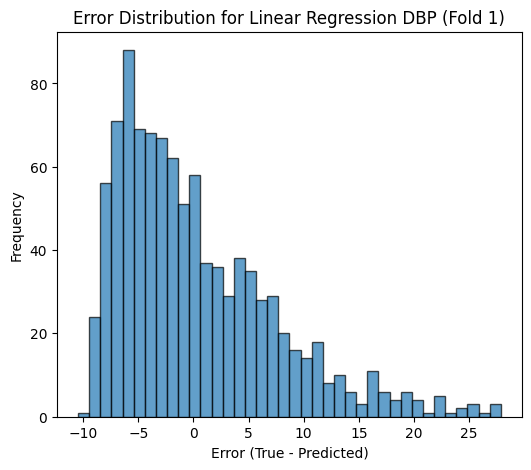

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 2)  0.006511  56.998058  7.549706  5.907917
                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 3) -0.006297  52.783413  7.265219  5.697246
                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 4)  0.008525  57.430763  7.578309  5.745246
                            Model       R^2        MSE      RMSE      MAE
0  Linear Regression DBP (Fold 5)  0.000265  54.564163  7.386756  5.77011

Linear Regression DBP Mean ± Std over 5 folds:
R^2: 0.0027 ± 0.0053
MSE: 54.6425 ± 2.3266
RMSE: 7.3904 ± 0.1576
MAE: 5.7465 ± 0.0971

Linear Regression DBP BHS Evaluation (Mean over 5 folds):
Grade: C
Percent within 5 mmHg: 4.884e+01%
Percent within 10 mmHg: 8.954e+01%
Percent within 15 mmHg: 9.490e+01%

Linear Regression DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.019e-03
Standar

In [9]:
from sklearn.linear_model import LinearRegression

if MODELS_TO_TEST["LinearRegression"]:
    # DBP
    cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP", plot=True)

                            Model       R^2         MSE       RMSE       MAE
0  Linear Regression SBP (Fold 1)  0.011553  358.866608  18.943775  15.62141


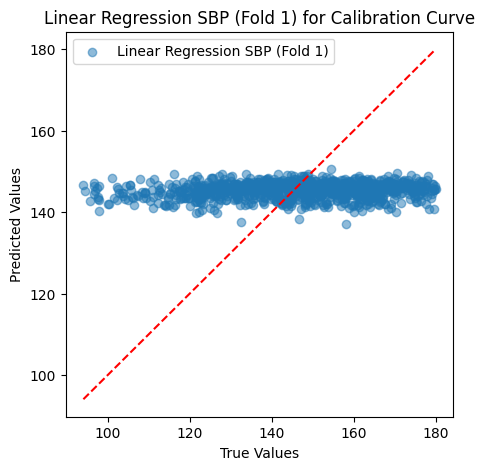

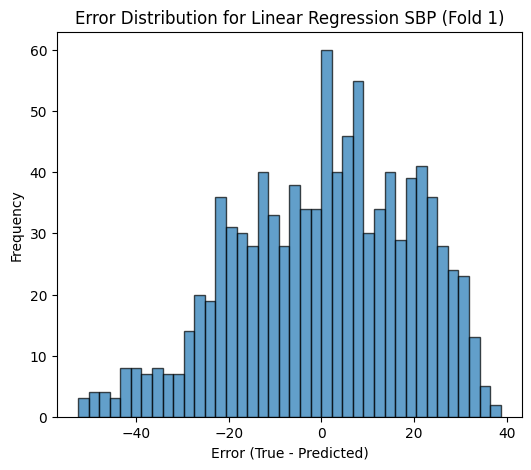

                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 2)  0.003547  355.704956  18.860142  15.701054
                            Model       R^2        MSE       RMSE        MAE
0  Linear Regression SBP (Fold 3)  0.003142  378.03772  19.443192  15.907565
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 4) -0.001851  359.860718  18.969995  15.697351
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 5)  0.007162  361.681824  19.017935  15.623231

Linear Regression SBP Mean ± Std over 5 folds:
R^2: 0.0047 ± 0.0045
MSE: 362.8304 ± 7.8471
RMSE: 19.0470 ± 0.2046
MAE: 15.7101 ± 0.1045

Linear Regression SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 1.873e+01%
Percent within 10 mmHg: 3.608e+01%
Percent within 15 mmHg: 5.175e+01%

Linear Regression SBP AAMI Evaluation (Mean over 5 folds):
Mean Erro

In [10]:
if MODELS_TO_TEST["LinearRegression"]:
    # SBP
    cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP", plot=True)

## Random Forest Regressor

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 1)  0.009585  51.164335  7.152925  5.590826


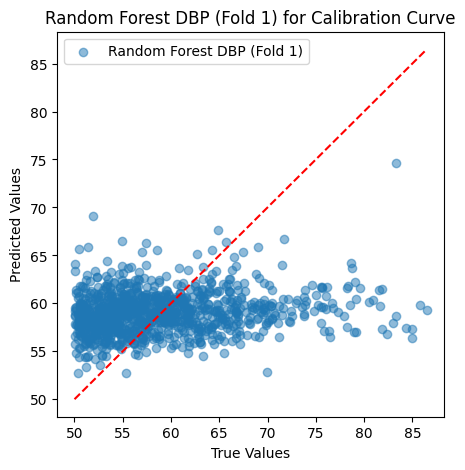

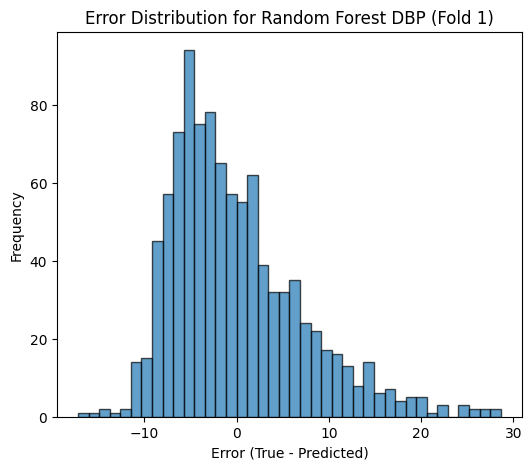

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 2)  0.031361  55.572419  7.454691  5.876794
                        Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 3) -0.00839  52.893216  7.272772  5.743516
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 4)  0.060944  54.394388  7.375255  5.647434
                        Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 5)  0.03861  52.471379  7.243713  5.670658

Random Forest DBP Mean ± Std over 5 folds:
R^2: 0.0264 ± 0.0239
MSE: 53.2991 ± 1.5346
RMSE: 7.2999 ± 0.1050
MAE: 5.7058 ± 0.0985

Random Forest DBP BHS Evaluation (Mean over 5 folds):
Grade: C
Percent within 5 mmHg: 5.035e+01%
Percent within 10 mmHg: 8.706e+01%
Percent within 15 mmHg: 9.543e+01%

Random Forest DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.485e-01
Standard Deviation (mmHg): 7.29
Pass/Fail: Pass


In [11]:
from sklearn.ensemble import RandomForestRegressor

if MODELS_TO_TEST["RandomForestRegressor"]:
    # DBP
    cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

                        Model       R^2         MSE      RMSE       MAE
0  Random Forest SBP (Fold 1)  0.137965  312.971135  17.69099  14.01517


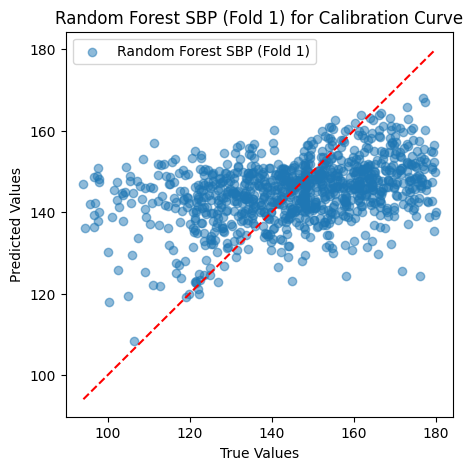

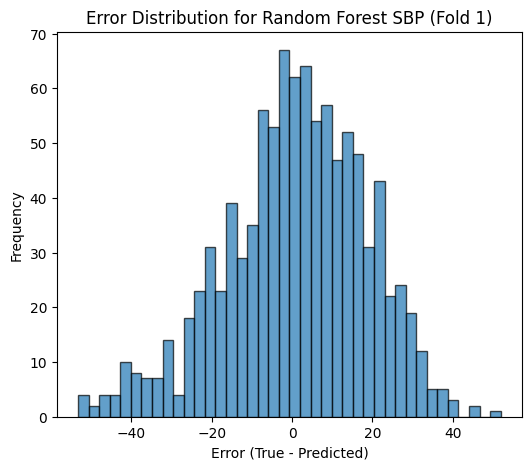

                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 2)  0.160815  299.564685  17.307937  13.806813
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 3)  0.157613  319.457848  17.873384  14.108717
                        Model       R^2        MSE       RMSE        MAE
0  Random Forest SBP (Fold 4)  0.158291  302.33816  17.387874  13.826061
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 5)  0.135855  314.800061  17.742606  14.214736

Random Forest SBP Mean ± Std over 5 folds:
R^2: 0.1501 ± 0.0108
MSE: 309.8264 ± 7.5996
RMSE: 17.6006 ± 0.2162
MAE: 13.9943 ± 0.1585

Random Forest SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.289e+01%
Percent within 10 mmHg: 4.370e+01%
Percent within 15 mmHg: 6.075e+01%

Random Forest SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.925e-01
Standard Deviation (mmHg

In [12]:
if MODELS_TO_TEST["RandomForestRegressor"]:
    # SBP
    cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

## XGBoost Regressor

                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 1) -0.151842  59.503563  7.713855  5.872109


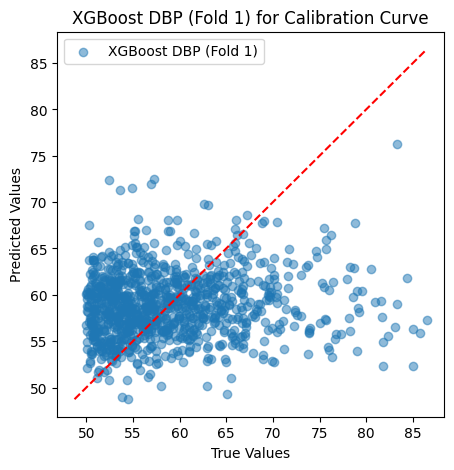

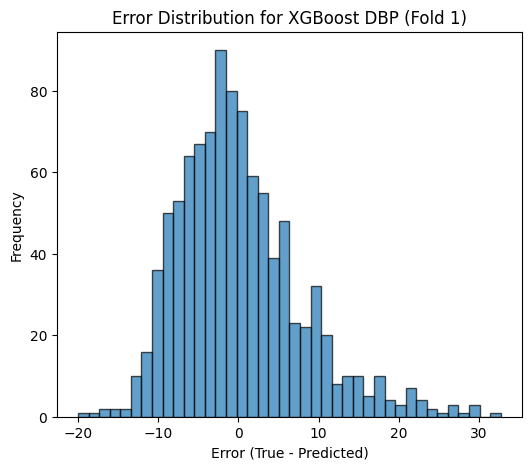

                  Model      R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 2) -0.07903  61.905716  7.868019  6.084198
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 3) -0.150532  60.349022  7.768463  5.967882
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 4) -0.057866  61.276375  7.827923  5.905181
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 5) -0.070238  58.412121  7.642782  5.862269

XGBoost DBP Mean ± Std over 5 folds:
R^2: -0.1019 ± 0.0408
MSE: 60.2894 ± 1.2435
RMSE: 7.7642 ± 0.0802
MAE: 5.9383 ± 0.0818

XGBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.161e+01%
Percent within 10 mmHg: 8.271e+01%
Percent within 15 mmHg: 9.444e+01%

XGBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -9.089e-02
Standard Deviation (mmHg): 7.77
Pass/Fail: Pass


In [13]:
from xgboost import XGBRegressor

if MODELS_TO_TEST["XGBRegressor"]:
    # DBP
    cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 1)  0.021112  355.395874  18.851946  14.797199


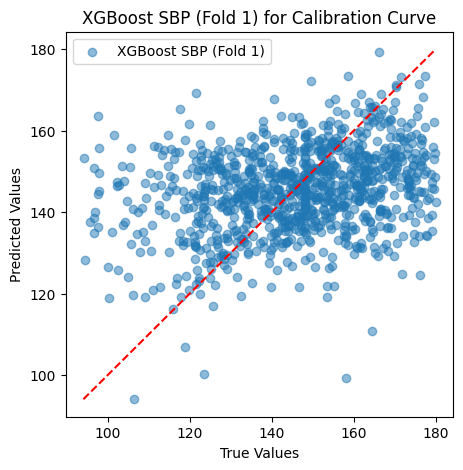

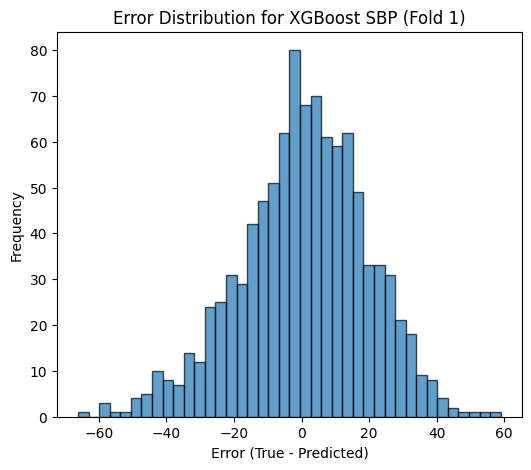

                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 2)  0.004598  355.329742  18.850193  14.764399
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 3)  0.091708  344.450714  18.559383  14.858233
                  Model      R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 4)  0.05603  339.070068  18.413855  14.784254
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 5) -0.002316  365.134613  19.108496  15.016072

XGBoost SBP Mean ± Std over 5 folds:
R^2: 0.0342 ± 0.0351
MSE: 351.8762 ± 9.1568
RMSE: 18.7568 ± 0.2442
MAE: 14.8440 ± 0.0916

XGBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.218e+01%
Percent within 10 mmHg: 4.158e+01%
Percent within 15 mmHg: 5.798e+01%

XGBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.459e-02
Standard Deviation (mmHg): 18.76
Pass/Fail: Fail


In [14]:
if MODELS_TO_TEST["XGBRegressor"]:
    # SBP
    cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

## Support Vector Machine

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 1) -0.075624  55.566212  7.454275  5.474446


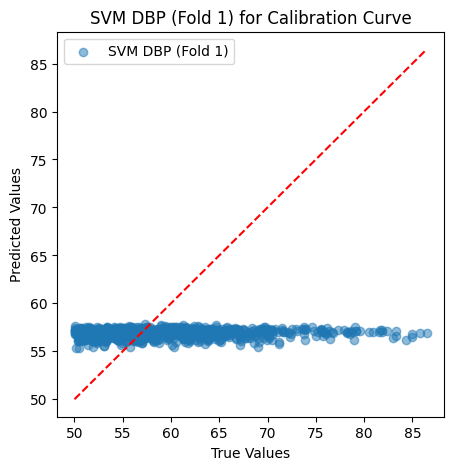

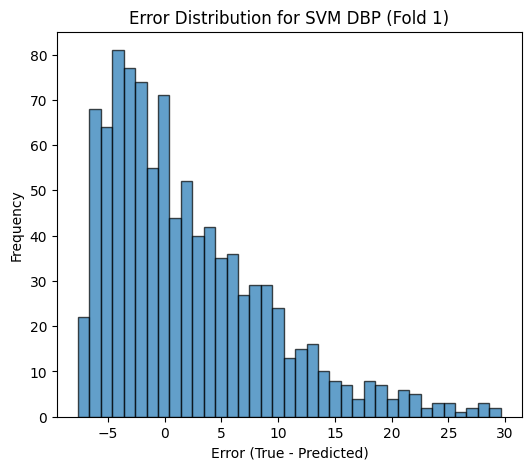

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 2) -0.079481  61.931607  7.869664  5.830429
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 3) -0.046245  54.878805  7.408023  5.438871
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 4) -0.044566  60.506024  7.778562  5.535605
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 5) -0.051057  57.365252  7.573985  5.598049

SVM DBP Mean ± Std over 5 folds:
R^2: -0.0594 ± 0.0150
MSE: 58.0496 ± 2.7493
RMSE: 7.6169 ± 0.1800
MAE: 5.5755 ± 0.1385

SVM DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.717e+01%
Percent within 10 mmHg: 8.659e+01%
Percent within 15 mmHg: 9.329e+01%

SVM DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.831e+00
Standard Deviation (mmHg): 7.39
Pass/Fail: Pass


In [15]:
from sklearn.svm import SVR

if MODELS_TO_TEST["SupportVectorRegressor"]:
    # DBP
    cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

              Model       R^2         MSE      RMSE        MAE
0  SVM SBP (Fold 1) -0.006788  365.525451  19.11872  15.536955


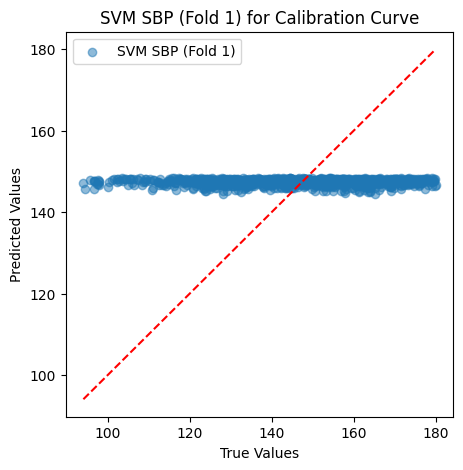

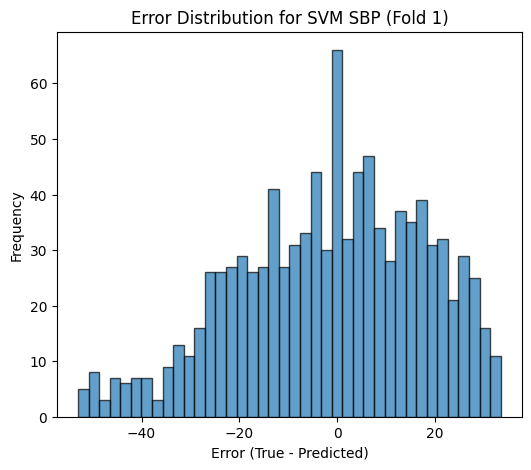

              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 2) -0.000729  357.231436  18.900567  15.435913
              Model       R^2         MSE      RMSE        MAE
0  SVM SBP (Fold 3) -0.016778  385.591752  19.63649  15.706822
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 4) -0.017358  365.430503  19.116237  15.466001
              Model       R^2        MSE       RMSE        MAE
0  SVM SBP (Fold 5) -0.020017  371.58278  19.276483  15.609565

SVM SBP Mean ± Std over 5 folds:
R^2: -0.0123 ± 0.0073
MSE: 369.0724 ± 9.4366
RMSE: 19.2097 ± 0.2446
MAE: 15.5511 ± 0.0984

SVM SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.032e+01%
Percent within 10 mmHg: 3.745e+01%
Percent within 15 mmHg: 5.304e+01%

SVM SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -2.060e+00
Standard Deviation (mmHg): 19.09
Pass/Fail: Fail


In [16]:
if MODELS_TO_TEST["SupportVectorRegressor"]:
    # SBP
    cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

## CatBoost

                   Model       R^2        MSE     RMSE       MAE
0  CatBoost DBP (Fold 1) -0.027294  53.069483  7.28488  5.682163


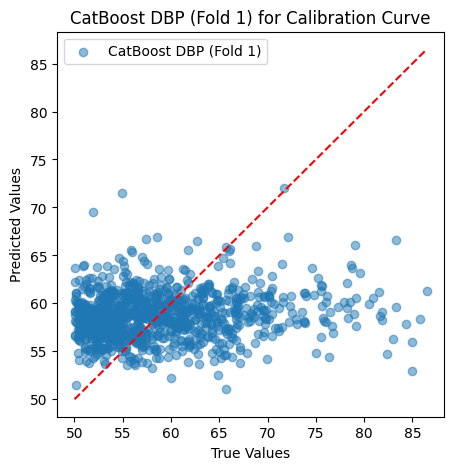

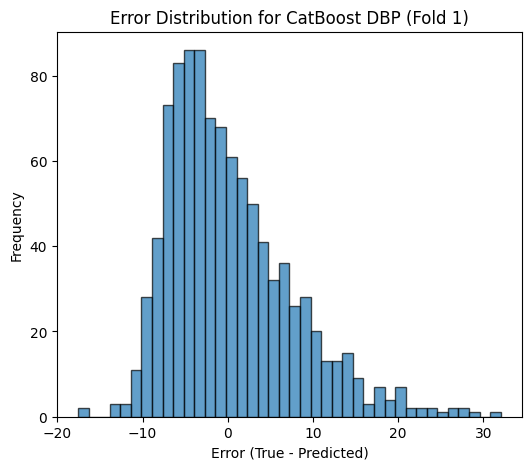

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 2)  0.006864  56.977815  7.548365  5.914571
                   Model      R^2       MSE      RMSE       MAE
0  CatBoost DBP (Fold 3) -0.03527  54.30313  7.369066  5.760307
                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 4)  0.032992  56.013512  7.484218  5.623913
                   Model      R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 5)  0.00023  54.566067  7.386885  5.746756

CatBoost DBP Mean ± Std over 5 folds:
R^2: -0.0045 ± 0.0246
MSE: 54.9860 ± 1.3667
RMSE: 7.4147 ± 0.0921
MAE: 5.7455 ± 0.0976

CatBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.153e+01%
Percent within 10 mmHg: 8.637e+01%
Percent within 15 mmHg: 9.509e+01%

CatBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.342e-02
Standard Deviation (mmHg): 7.41
Pass/Fail: Pass


In [17]:
from catboost import CatBoostRegressor

if MODELS_TO_TEST["CatBoostRegressor"]:
    # DBP
    cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 1)  0.101335  326.270052  18.062947  14.350102


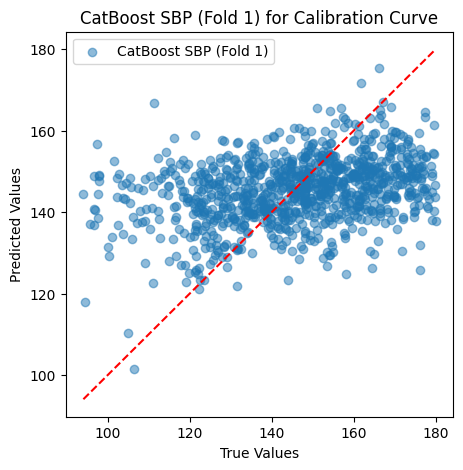

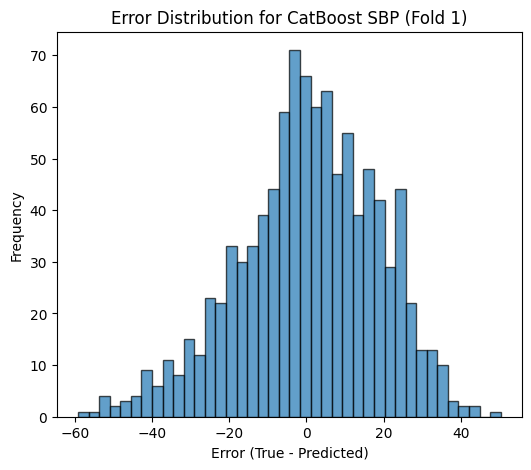

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 2)  0.130746  310.298657  17.615296  14.119187
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 3)  0.131215  329.468563  18.151269  14.501438
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 4)  0.118353  316.683821  17.795612  14.161977
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 5)  0.090107  331.465795  18.206202  14.528976

CatBoost SBP Mean ± Std over 5 folds:
R^2: 0.1144 ± 0.0163
MSE: 322.8374 ± 8.0659
RMSE: 17.9663 ± 0.2251
MAE: 14.3323 ± 0.1685

CatBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.184e+01%
Percent within 10 mmHg: 4.273e+01%
Percent within 15 mmHg: 5.921e+01%

CatBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.382e-02
Standard Deviation (mmHg): 17.97
Pass/Fail: Fail


In [18]:
if MODELS_TO_TEST["CatBoostRegressor"]:
    # SBP
    cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})

## Multilayer Perceptron Regressor

In [19]:
MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 200

In [20]:
from sklearn.neural_network import MLPRegressor

if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # DBP
    cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

In [21]:
if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # SBP
    cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

### Multilayer Perceptron w/ Scaled X and Y

In [22]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # DBP
    cross_val_regression(
        MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=dbp_scaler
    )

In [23]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # SBP
    cross_val_regression(
        MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=sbp_scaler
    )

# Causal Analysis

## Direct LINGAM

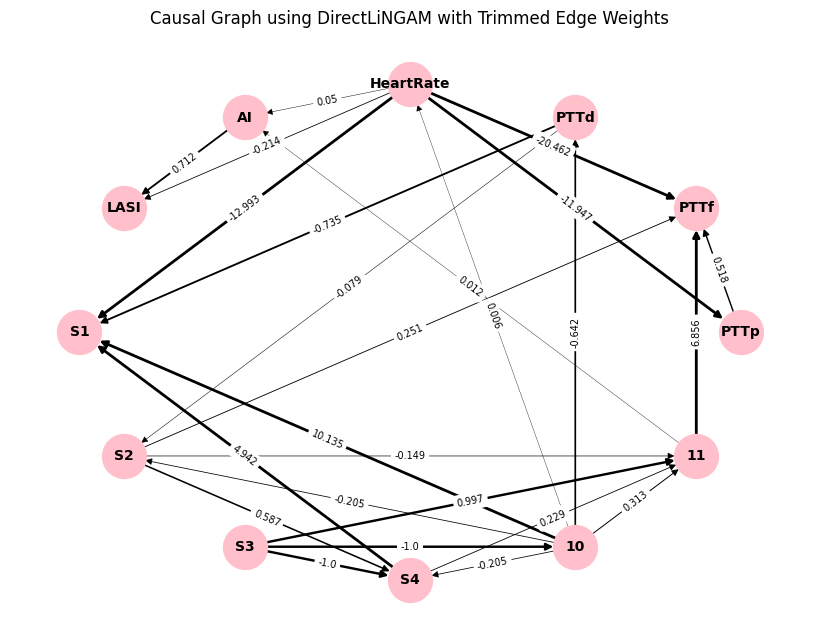

In [24]:
from lingam import DirectLiNGAM
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

EDGE_THRESHOLD = 0.005

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(dataset_df)

# Get the adjacency matrix
adjacency_matrix = model.adjacency_matrix_

# Create a directed graph using NetworkX
causal_graph = nx.DiGraph(adjacency_matrix)

# Relabel nodes with feature names
causal_graph = nx.relabel_nodes(causal_graph, {i: col for i, col in enumerate(X.columns)})

# Remove edges with weights less than 0.005
edges_to_remove = [(u, v) for u, v, d in causal_graph.edges(data=True) if abs(d['weight']) < EDGE_THRESHOLD]
causal_graph.remove_edges_from(edges_to_remove)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(causal_graph)
edge_weights = [min(abs(weight) * 1.5 + 0.25, 2) for weight in nx.get_edge_attributes(causal_graph, 'weight').values()]
nx.draw(
    causal_graph, pos, with_labels=True, node_size=1000, node_color="pink",
    font_size=10, font_weight="bold", edge_color="black", width=edge_weights
)

# Add edge weights as labels
edge_labels = {edge: round(weight, 3) for edge, weight in nx.get_edge_attributes(causal_graph, 'weight').items()}
nx.draw_networkx_edge_labels(causal_graph, pos, edge_labels=edge_labels, font_size=7, )

plt.title("Causal Graph using DirectLiNGAM with Trimmed Edge Weights")
plt.savefig('figures/causal_graph_direct_lingam.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## CATE Estimation

In [25]:
from econml.dml import CausalForestDML

# Initialize the CausalForestDML model
causal_forest_sbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_sbp.fit(Y=sbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_sbp = causal_forest_sbp.const_marginal_effect(X=X.values)

       PTTp     PTTf      PTTd  HeartRate        AI      LASI          S1  \
0  1.169263 -0.48537 -0.021973  -0.644064  3.453374 -1.682922 -148.638374   

           S2          S3          S4  
0 -146.672913 -148.303191  148.086625  


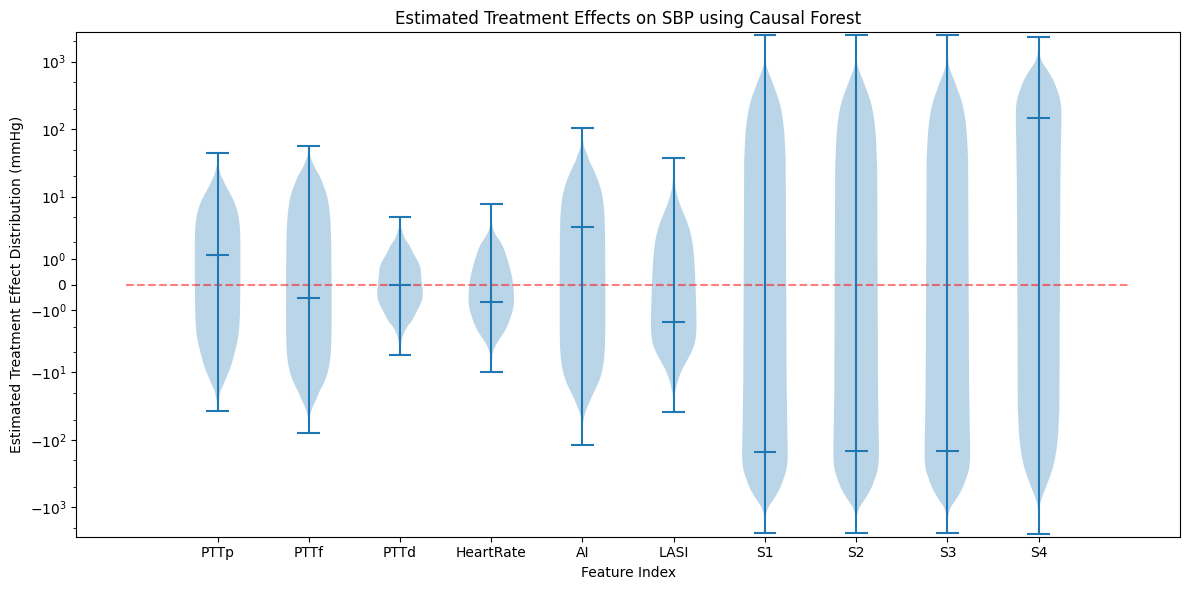

In [26]:
treatment_effects_sbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_sbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_sbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_sbp[:, i] for i in range(treatment_effects_sbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on SBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

In [27]:
# Initialize the CausalForestDML model
causal_forest_dbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_dbp.fit(Y=dbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_dbp = causal_forest_dbp.const_marginal_effect(X=X.values)

      PTTp      PTTf     PTTd  HeartRate        AI      LASI         S1  \
0  0.12059 -1.180059 -0.01788   0.205487 -0.485768  1.437148  97.293929   

          S2         S3         S4  
0  96.383189  97.414422 -96.680884  


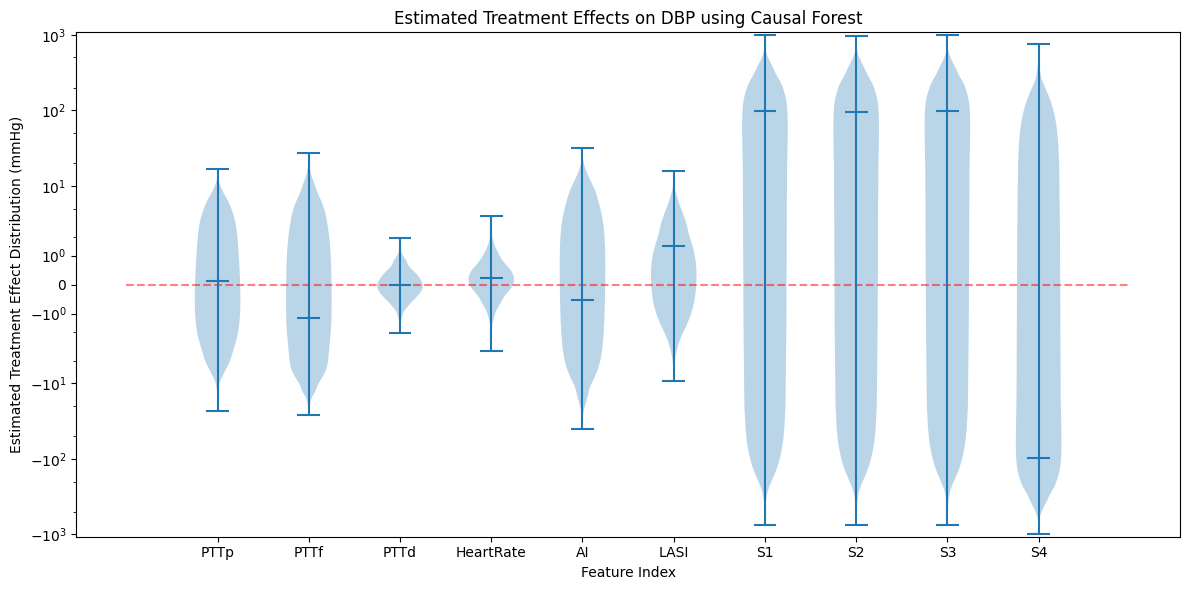

In [28]:
treatment_effects_dbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_dbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_dbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_dbp[:, i] for i in range(treatment_effects_dbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on DBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

## Causally "Regularized" Models

In [29]:
import torch
from sklearn.base import BaseEstimator, RegressorMixin

import torch.nn as nn
import torch.optim as optim

class CausallyRegularizedNN(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_layer_sizes=(64, 64, 32, 16), learning_rate=0.001, 
                 max_iter=500, causal_regularization_weight=1, random_state=42):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.causal_regularization_weight = causal_regularization_weight
        self.random_state = random_state
        
    def _build_network(self):
        layers = []
        prev_size = self.input_dim
        
        for hidden_size in self.hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, 1))
        
        return nn.Sequential(*layers)
    
    def fit(self, X, y):
        torch.manual_seed(self.random_state)
        
        self.model = self._build_network()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y).reshape(-1, 1)
        
        # Early stopping variables
        best_loss = float('inf')
        patience = 10
        patience_counter = 0
        
        for epoch in range(self.max_iter):
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(X_tensor)
            
            # Standard MSE loss
            mse_loss = self.criterion(outputs, y_tensor)
            
            # Causal regularization: penalize large weights in early layers
            causal_penalty = 0
            for i, layer in enumerate(self.model):
                if isinstance(layer, nn.Linear):
                    # Higher penalty for earlier layers (closer to input)
                    layer_weight = (len(self.hidden_layer_sizes) - i) / len(self.hidden_layer_sizes)
                    causal_penalty += layer_weight * torch.norm(layer.weight, p=1)
            
            # Total loss
            total_loss = mse_loss + self.causal_regularization_weight * abs(causal_penalty)
            print(f'Epoch {epoch+1}/{self.max_iter}, Loss: {total_loss.item():.4f} (MSE: {mse_loss.item():.4f}, Causal Penalty: {abs(causal_penalty.item()):.4f})')
            
            # Early stopping check
            if total_loss.item() < best_loss:
                best_loss = total_loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
            
            total_loss.backward()
            self.optimizer.step()
            
        return self
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            predictions = self.model(X_tensor)
        return predictions.numpy().flatten()

def train_and_evaluate_causal_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    # Add input dimension to model kwargs
    if model_kwargs is None:
        model_kwargs = {}
    model_kwargs['input_dim'] = X_train.shape[1]
    
    model = model_cls(**model_kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    return y_test, y_pred

Epoch 1/200, Loss: 206.1135 (MSE: 1.0198, Causal Penalty: 205.0937)
Epoch 2/200, Loss: 203.1730 (MSE: 1.0176, Causal Penalty: 202.1554)
Epoch 3/200, Loss: 200.2498 (MSE: 1.0156, Causal Penalty: 199.2342)
Epoch 4/200, Loss: 197.3436 (MSE: 1.0138, Causal Penalty: 196.3299)
Epoch 5/200, Loss: 194.4538 (MSE: 1.0121, Causal Penalty: 193.4417)
Epoch 6/200, Loss: 191.5886 (MSE: 1.0107, Causal Penalty: 190.5780)
Epoch 7/200, Loss: 188.7440 (MSE: 1.0094, Causal Penalty: 187.7346)
Epoch 8/200, Loss: 185.9259 (MSE: 1.0085, Causal Penalty: 184.9174)
Epoch 9/200, Loss: 183.1265 (MSE: 1.0077, Causal Penalty: 182.1188)
Epoch 10/200, Loss: 180.3438 (MSE: 1.0069, Causal Penalty: 179.3368)
Epoch 11/200, Loss: 177.5740 (MSE: 1.0062, Causal Penalty: 176.5678)
Epoch 12/200, Loss: 174.8174 (MSE: 1.0055, Causal Penalty: 173.8119)
Epoch 13/200, Loss: 172.0691 (MSE: 1.0049, Causal Penalty: 171.0642)
Epoch 14/200, Loss: 169.3439 (MSE: 1.0043, Causal Penalty: 168.3397)
Epoch 15/200, Loss: 166.6385 (MSE: 1.0037, 

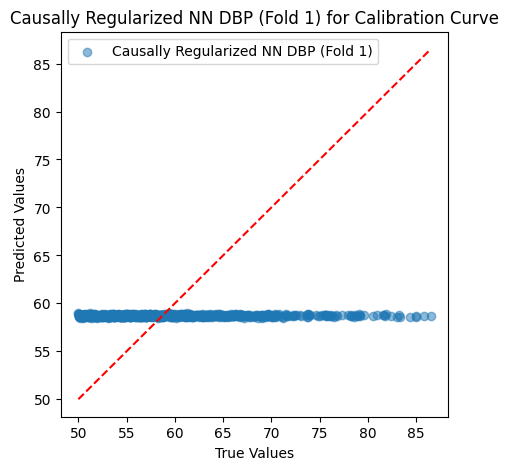

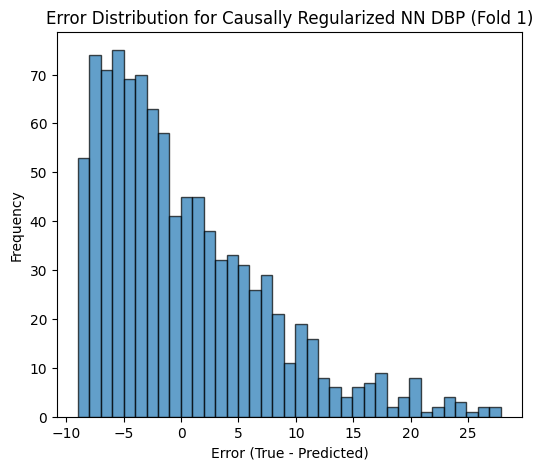

Epoch 1/200, Loss: 206.1134 (MSE: 1.0197, Causal Penalty: 205.0937)
Epoch 2/200, Loss: 203.1730 (MSE: 1.0176, Causal Penalty: 202.1554)
Epoch 3/200, Loss: 200.2498 (MSE: 1.0156, Causal Penalty: 199.2342)
Epoch 4/200, Loss: 197.3437 (MSE: 1.0138, Causal Penalty: 196.3299)
Epoch 5/200, Loss: 194.4538 (MSE: 1.0122, Causal Penalty: 193.4417)
Epoch 6/200, Loss: 191.5887 (MSE: 1.0107, Causal Penalty: 190.5780)
Epoch 7/200, Loss: 188.7441 (MSE: 1.0095, Causal Penalty: 187.7346)
Epoch 8/200, Loss: 185.9259 (MSE: 1.0085, Causal Penalty: 184.9174)
Epoch 9/200, Loss: 183.1264 (MSE: 1.0077, Causal Penalty: 182.1188)
Epoch 10/200, Loss: 180.3438 (MSE: 1.0069, Causal Penalty: 179.3369)
Epoch 11/200, Loss: 177.5741 (MSE: 1.0063, Causal Penalty: 176.5678)
Epoch 12/200, Loss: 174.8174 (MSE: 1.0056, Causal Penalty: 173.8118)
Epoch 13/200, Loss: 172.0692 (MSE: 1.0050, Causal Penalty: 171.0642)
Epoch 14/200, Loss: 169.3441 (MSE: 1.0044, Causal Penalty: 168.3396)
Epoch 15/200, Loss: 166.6387 (MSE: 1.0038, 

In [30]:
# DBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, dbp.values, 
    label="Causally Regularized NN DBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=dbp_scaler
)

Epoch 1/200, Loss: 206.1131 (MSE: 1.0194, Causal Penalty: 205.0937)
Epoch 2/200, Loss: 203.1725 (MSE: 1.0171, Causal Penalty: 202.1554)
Epoch 3/200, Loss: 200.2493 (MSE: 1.0151, Causal Penalty: 199.2342)
Epoch 4/200, Loss: 197.3431 (MSE: 1.0132, Causal Penalty: 196.3299)
Epoch 5/200, Loss: 194.4532 (MSE: 1.0115, Causal Penalty: 193.4417)
Epoch 6/200, Loss: 191.5880 (MSE: 1.0100, Causal Penalty: 190.5779)
Epoch 7/200, Loss: 188.7433 (MSE: 1.0087, Causal Penalty: 187.7346)
Epoch 8/200, Loss: 185.9252 (MSE: 1.0077, Causal Penalty: 184.9174)
Epoch 9/200, Loss: 183.1256 (MSE: 1.0069, Causal Penalty: 182.1188)
Epoch 10/200, Loss: 180.3430 (MSE: 1.0061, Causal Penalty: 179.3369)
Epoch 11/200, Loss: 177.5733 (MSE: 1.0055, Causal Penalty: 176.5678)
Epoch 12/200, Loss: 174.8167 (MSE: 1.0049, Causal Penalty: 173.8118)
Epoch 13/200, Loss: 172.0684 (MSE: 1.0043, Causal Penalty: 171.0641)
Epoch 14/200, Loss: 169.3433 (MSE: 1.0037, Causal Penalty: 168.3397)
Epoch 15/200, Loss: 166.6378 (MSE: 1.0031, 

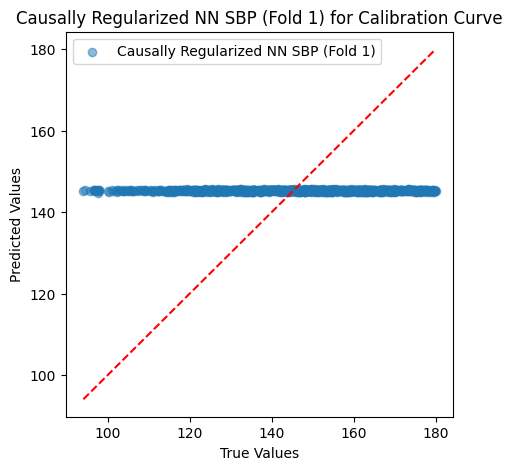

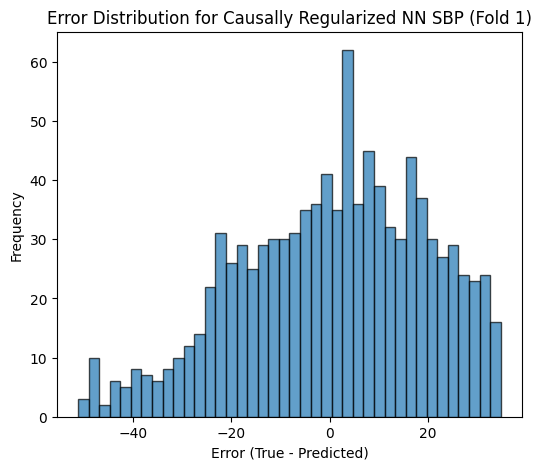

Epoch 1/200, Loss: 206.1132 (MSE: 1.0195, Causal Penalty: 205.0937)
Epoch 2/200, Loss: 203.1727 (MSE: 1.0173, Causal Penalty: 202.1554)
Epoch 3/200, Loss: 200.2495 (MSE: 1.0153, Causal Penalty: 199.2342)
Epoch 4/200, Loss: 197.3433 (MSE: 1.0135, Causal Penalty: 196.3299)
Epoch 5/200, Loss: 194.4534 (MSE: 1.0118, Causal Penalty: 193.4417)
Epoch 6/200, Loss: 191.5883 (MSE: 1.0103, Causal Penalty: 190.5779)
Epoch 7/200, Loss: 188.7437 (MSE: 1.0091, Causal Penalty: 187.7346)
Epoch 8/200, Loss: 185.9255 (MSE: 1.0081, Causal Penalty: 184.9174)
Epoch 9/200, Loss: 183.1260 (MSE: 1.0072, Causal Penalty: 182.1188)
Epoch 10/200, Loss: 180.3433 (MSE: 1.0064, Causal Penalty: 179.3368)
Epoch 11/200, Loss: 177.5736 (MSE: 1.0058, Causal Penalty: 176.5678)
Epoch 12/200, Loss: 174.8170 (MSE: 1.0051, Causal Penalty: 173.8118)
Epoch 13/200, Loss: 172.0686 (MSE: 1.0045, Causal Penalty: 171.0641)
Epoch 14/200, Loss: 169.3437 (MSE: 1.0039, Causal Penalty: 168.3397)
Epoch 15/200, Loss: 166.6382 (MSE: 1.0034, 

In [31]:
# DBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, sbp.values, 
    label="Causally Regularized NN SBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=sbp_scaler
)